In [4]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [8]:
# Prepare Data
X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))
Y = Y.view(Y.shape[0], 1)

print(X.shape, Y.shape)

n_samples, n_features = X.shape[0], X.shape[1]

torch.Size([100, 1]) torch.Size([100, 1])


In [9]:
# Linear Model
input_size, output_size = n_features, 1
model = nn.Linear(input_size, output_size)

In [10]:
# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [17]:
# Training Loop
n_iters = 100
for epoch in range(n_iters):
    y_pred = model(X)
    l = criterion(y_pred, Y)
    
    l.backward()
    optimizer.step()
    
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        print("Epoch: {}, Loss : {}".format(epoch, l))
        

Epoch: 0, Loss : 332.56756591796875
Epoch: 10, Loss : 332.567626953125
Epoch: 20, Loss : 332.567626953125
Epoch: 30, Loss : 332.56756591796875
Epoch: 40, Loss : 332.56756591796875
Epoch: 50, Loss : 332.56756591796875
Epoch: 60, Loss : 332.56756591796875
Epoch: 70, Loss : 332.5675354003906
Epoch: 80, Loss : 332.5675354003906
Epoch: 90, Loss : 332.5675354003906


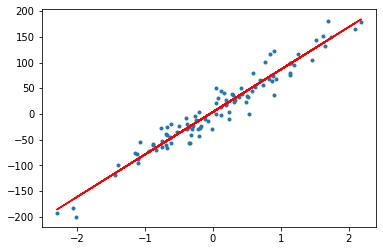

In [23]:
predicted = model(X).detach()
plt.scatter(X_numpy, Y_numpy, marker=".")
plt.plot(X_numpy, predicted, 'r')
plt.show()